 # A Beginner's attempt at Titanic Survival prediction competition #


## Input the Data ##

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

tit = pd.read_csv('C://Users//91836//Documents//DataSets//Titanic//train.csv')
tit_test = pd.read_csv('C://Users//91836//Documents//DataSets//Titanic//test.csv')
pd.set_option('display.max_columns', None)
tit.rename_axis("Passenger Info",axis="columns")

Passenger Info,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Exploration ##



NA values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 (891, 12)
Object columns:
                                                 Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  
Numerical Columns:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1      

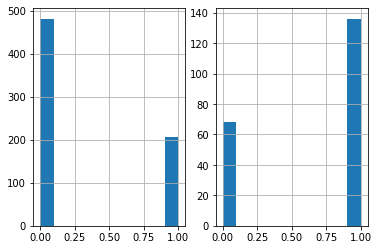

Ticket
1    92
2    85
3    72
P    42
S    21
C    16
F     4
W     2
A     2
4     2
L     1
9     1
7     1
6     1
8     0
5     0
Name: Survived, dtype: int64
Ticket
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240      1
349241      1
347464      1
Length: 681, dtype: int64
Ticket
1    111
P     44
3     22
2     15
S      4
W      3
C      2
F      1
6      1
5      1
L      0
A      0
9      0
8      0
7      0
4      0
dtype: int64
['A' 'P' 'S' '1' '3' '2' 'C' '7' 'W' '4' 'F' 'L' '9' '6' '5' '8']


In [20]:
y = tit.Survived

# Drop rows with empty target value
tit = tit.dropna(subset=['Survived'])

print('NA values per column:\n',pd.isnull(tit).sum(),tit.shape) # How many empty values for each column

#tit = tit.dropna() # Very basic means of handling missing values. Not encouraged
#print(pd.isnull(tit).sum(),tit.shape)

# As you can see dropna dropped rows with very useful info. So go for other approaches

numerical_cols = tit.select_dtypes(exclude=['object']).columns
categorical_cols = [col for col in tit.columns if tit[col].dtype == 'object' and tit[col].nunique()<10]
object_cols = tit.select_dtypes(include=['object']).columns
print("Object columns:\n",tit[object_cols].head())
print("Numerical Columns:\n",tit[numerical_cols].head())
print("All the column names: ",tit.columns)

print("Categorical Columns:\n ", categorical_cols)

print("Fare of ticket when no cabin was assigned",tit.loc[tit.Cabin.isna(),'Fare'].describe())
print("Fare of ticket for people who had cabin assigned to them",tit.loc[tit.Cabin.notna(),'Fare'].describe())

# So this is an indication of division of poor/rich. Let's confim if there is a direct correlation to their survivial
plt.subplot(1,2,1)
print("Survival of people with no cabins",tit.loc[tit.Cabin.isna(),'Survived'].hist())
plt.subplot(1,2,2)
print("Survival of people with cabins",tit.loc[tit.Cabin.notna(),'Survived'].hist())
plt.show()
#So high percetage of people with cabins survived as compared to people with no cabins. 
#So while imputing NaN or NA values of Cabin add extra column of cabin missing or not.

#Let's find out the correlation between cabin number and survival

tit.groupby('Cabin').Survived.sum().sort_values(ascending=False)

# No correlation as such so probably we can replace cabin column with cabin_was_missing column.

tit.groupby("Pclass").apply(lambda p : p.Survived.sum())

#Many people belonging to Passenger class 1 survived.

tit.groupby("Pclass").apply(lambda p: p.Cabin.notna().sum()) # Number of passenger per class who had their cabin assigned to them

#Majority of class 1 had cabin assigned to them

tit.groupby("Embarked").Survived.sum()

#Many who came from S:Southampton survived.
#Were they rich or had cabins by any chance?

tit.groupby("Embarked").apply(lambda p: p.Cabin.notna().sum())

#Majority of SOuthampton passenegers had cabins.

tit.groupby("Sex").Survived.sum()

#More females survived than men. Meaning women were evacuated first.


tit.groupby("Age").Survived.sum().sort_values(ascending=False)

# Age at first look doesnt seem to decide the Survival as such

tit.groupby("Ticket").Survived.sum().sort_values(ascending=False)

# For ticket number, individual outliers that cannot be correlated or generalised.

tit.groupby("Fare").Survived.sum().sort_values(ascending=True)

#Not a good indicator of survival

#How first two characters of Ticket decide Survival
print(tit.groupby(tit.Ticket.map(lambda p: p[0])).Survived.sum().sort_values(ascending=False))
#Number of people per ticket
print(tit.groupby("Ticket").size().sort_values(ascending=False))

#For each ticket type (first 2 characters) how many Cabins were assigned
print(tit.groupby(tit.Ticket.map(lambda p: p[0])).apply(lambda p: p.Cabin.notna().sum()).sort_values(ascending=False))

# You can try to use tit.Ticket.map(lambda p: p[0]) as a feature.
print(tit.Ticket.map(lambda p: p[0]).unique())


### Feature Generation and Selection ##

In [22]:
from sklearn.model_selection import train_test_split

tit["Cabin_Was_missing"] = tit.Cabin.isna()
tit_test["Cabin_Was_missing"] = tit_test.Cabin.isna()

tit["Ticket_First_Char"] = tit.Ticket.map(lambda p: p[0])
tit_test["Ticket_First_Char"] = tit_test.Ticket.map(lambda p: p[0])

tit["Family"] = tit.apply(lambda p: (int(pd.notnull(p.SibSp)) * p.SibSp) + (int(pd.notnull(p.Parch)) * p.Parch),axis='columns') #Total number of family memebers per passenger
tit_test["Family"] = tit_test.apply(lambda p: (int(pd.notnull(p.SibSp)) * p.SibSp) + (int(pd.notnull(p.Parch)) * p.Parch),axis='columns')

#Extra checks in case a value is null like SibSp and other is not. Then total family should not be NaN or NA but its has to be still Parch.

#Include the above column as part of your features instead of Cabin column

features = ["Pclass","Sex","Age","Cabin_Was_missing","Embarked","Family"] 
# Sex and Embarked are categorical with low cardinality

X = tit[features]
X_train,X_valid,y_train,y_valid = train_test_split(X,y)
X

,Pclass,Sex,Age,Cabin_Was_missing,Embarked,Family
0,3,male,22.0,True,S,1
1,1,female,38.0,False,C,1
2,3,female,26.0,True,S,0
3,1,female,35.0,False,S,1
4,3,male,35.0,True,S,0
...,...,...,...,...,...,...
886,2,male,27.0,True,S,0
887,1,female,19.0,False,S,0
888,3,female,NaN,True,S,3
889,1,male,26.0,False,C,0


## Preprocessing ##

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

Pclass_pre = SimpleImputer(strategy='most_frequent')
Age_pre = SimpleImputer(strategy='mean')
tit.Sex = tit.Sex.fillna(method="bfill").fillna("Non-binary") # If Sex is undefined/NA assume it to be Non-binary
Sex_pre = OneHotEncoder(handle_unknown='ignore',sparse=False)
Embarked_pre = Pipeline(steps=[("embarked_impute",SimpleImputer(strategy = 'most_frequent')),
                              ("embarked_encode",OneHotEncoder(handle_unknown='ignore',sparse=False))])
# Missing values in Family depends upon Parch and SibSp values. But it is handled at creation of "Family" feature.

### Combine preprocessing steps ###


In [24]:
#Avoid Train Test Contamination by first splitting the dataset into Training and Validation set
preprocessing = ColumnTransformer(transformers=[("Pclass",Pclass_pre,["Pclass"]),
                                              ("Age",Age_pre,["Age"]),
                                                ("Sex",Sex_pre,["Sex"]),
                                                ("Embarked",Embarked_pre,["Embarked"])])

## Model Selection ##

In [25]:
def error(max_leaf_nodes):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes,random_state=0)
    my_pipeline = Pipeline(steps=[("preprocessing",preprocessing),
                                 ("model",model)])
    my_pipeline.fit(X_train,y_train)
    return mean_absolute_error(y_valid,my_pipeline.predict(X_valid))

for m in [5,9,10,12,14,15,17,18,19,20,30,50,75,100,125,150,175,200,250,500]:
    print("MAE at {} max_leaf_nodes: ".format(m),error(m))
# Therefore choose max_leaf_nodes = 18 or 19 or 20

MAE at 5 max_leaf_nodes:  0.18834080717488788
MAE at 9 max_leaf_nodes:  0.15246636771300448
MAE at 10 max_leaf_nodes:  0.15246636771300448
MAE at 12 max_leaf_nodes:  0.15246636771300448
MAE at 14 max_leaf_nodes:  0.15695067264573992
MAE at 15 max_leaf_nodes:  0.15246636771300448
MAE at 17 max_leaf_nodes:  0.15695067264573992
MAE at 18 max_leaf_nodes:  0.15695067264573992
MAE at 19 max_leaf_nodes:  0.15695067264573992
MAE at 20 max_leaf_nodes:  0.15246636771300448
MAE at 30 max_leaf_nodes:  0.17040358744394618
MAE at 50 max_leaf_nodes:  0.16591928251121077
MAE at 75 max_leaf_nodes:  0.16143497757847533
MAE at 100 max_leaf_nodes:  0.18385650224215247
MAE at 125 max_leaf_nodes:  0.18385650224215247
MAE at 150 max_leaf_nodes:  0.18385650224215247
MAE at 175 max_leaf_nodes:  0.18385650224215247
MAE at 200 max_leaf_nodes:  0.18385650224215247
MAE at 250 max_leaf_nodes:  0.18385650224215247
MAE at 500 max_leaf_nodes:  0.18385650224215247


## Define Model ##

In [27]:
model = RandomForestClassifier(random_state=0,max_leaf_nodes=20)
random_model = RandomForestClassifier(random_state=42,n_estimators=800,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=90,bootstrap=True)
#{'model__n_estimators': 800, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 90, 'model__bootstrap': True}
#{'model__n_estimators': 800, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 40, 'model__bootstrap': False}
#{'model__n_estimators': 2000, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 'auto', 'model__max_depth': None, 'model__bootstrap': True}

## Pipeline ##

In [28]:
my_pipeline = Pipeline(steps=[("preprocessing",preprocessing),
                             ("model",model)])
# To include early_stopping_rounds and manipulate other parameters(not possible at model definition stage)called Hypertuning Parameters, onto model while fitting data, use GridSearchCV part of model_selection package. https://www.kaggle.com/aashita/advanced-pipelines-tutorial
random_pipeline = Pipeline(steps=[('Preprocessing',preprocessing),('model',random_model)])
my_pipeline.fit(X_train,y_train)
random_pipeline.fit(X_train,y_train)
print("MAE when pipeline is deployed: ",mean_absolute_error(y_valid,my_pipeline.predict(X_valid)))

MAE when pipeline is deployed:  0.15246636771300448


## Cross Validation (since small dataset) ##

In [29]:
from sklearn.model_selection import cross_val_score

cross_validation_error = -1 * cross_val_score(my_pipeline,X,y,cv=5,scoring='neg_mean_absolute_error')

print("Average Cross Validation Error across 5 folds for base model: ",cross_validation_error.mean())

cross_validation_error_random = -1 * cross_val_score(random_pipeline,X,y,cv=5,scoring="neg_mean_absolute_error")

print("Average CV Error acroos 5 folds for random model:",cross_validation_error_random.mean())

Average Cross Validation Error across 5 folds for base model:  0.1919151340154416
Average CV Error acroos 5 folds for random model: 0.20423702215805664


## Hyperparameter Tuning ##

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Deafult values of attributes of Random Forest
# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_depth': None,
#  'max_features': 'auto',
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 10,
#  'n_jobs': 1,
#  'oob_score': False,
#  'random_state': 42,
#  'verbose': 0,
#  'warm_start': False}
param_grid = { 'model__bootstrap': [True, False],
 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
              
    
}
random_search = RandomizedSearchCV(estimator=my_pipeline, param_distributions = param_grid,cv = 5, n_iter=100, n_jobs = -1, verbose = 2)
#n_jobs = -1 means use all the available cores and n_iter=100 means search acroos 100 different combinations

# Fit the grid search to the data
random_search.fit(X_train, y_train)
print(random_search.best_params_)
# {'model__max_depth': 80, 'model__max_features': 2, 'model__min_samples_leaf': 4, 'model__min_samples_split': 12, 'model__n_estimators': 100}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


{'model__n_estimators': 600, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 'auto', 'model__max_depth': 80, 'model__bootstrap': False}


## Test on Test Set ##

In [33]:
my_preds = pd.DataFrame(my_pipeline.predict(tit_test[features]))

my_preds.columns = ["Survived"]

my_preds = my_preds.set_index(tit_test.PassengerId)

my_preds = my_preds.rename_axis("PassengerId",axis='rows')


my_preds.to_csv("C://Users//91836//Documents//DataSets//Titanic//preds.csv")

### Further avenues to explore ###
Explore HyperParamter Tuning for XGBClassifier and Model Selection for RandomForestClassifier